# Introduction to pandas
* The premier data science library
* Has two main objects : DataFrame, Series
* Is a wrapper around, among other libraries, NumPy and matplotlib
* Series is a vector of data with an index
* DataFrame is a collection of Series with a single index
* The name pandas derives from panel data 
* Was developed by a quant working for a hedge fund, long since retired by the age of about 27


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.__version__

'1.4.1'

* create a folder named data in the same directory as your notebook 
* download Archive.zip into it
* extract the contents of Archive.zip (may take a minute or two)

In [4]:
titles = pd.read_csv('data/titles.csv')
titles.head(3)

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002


In [7]:
cast =pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### basic operations
* df.head([optional value])
* df.tail([optional value])
* df['column name'] or df.column_name to subset by columns
* df[['col1, col2, col...']]
* df[column.isnull()]
* df[column.notnull()]
* df[column == some value] 
* df[(df.column > some value) & (df.column < some value)]
* df.sort_values(by=column, ascending=False) # for descending order
* df['column'].str.any_string_method
* df.index --> returns the index of df or subset
* df.sort_index()
* df.plot --> wrapper around matplotlib

In [9]:
titles[['title','year']]

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993
...,...,...
226008,Armageddon,1969
226009,Verit i znat,1986
226010,Muukalainen,2008
226011,Byeolmyeongbuteun unjeonsa,1977


In [10]:
titles['decade'] = titles.year // 10 * 10

In [11]:
titles.head()

,title,year,decade
0,Ankara ekspresi,1952,1950
1,"Ans Vaterland, ans teure",1915,1910
2,Miss Mohini,2002,2000
3,La vera madre,1999,1990
4,O Amerikanos,1993,1990


In [12]:
titles[titles.decade == 1950]

,title,year,decade
0,Ankara ekspresi,1952,1950
7,Duffy of San Quentin,1954,1950
32,Basahang ginto,1952,1950
47,Vendetta,1950,1950
54,The Pathfinder and the Mohican,1957,1950
...,...,...,...
225975,The Steel Trap,1952,1950
225977,Gunmen from Laredo,1959,1950
225981,Einmal keine Sorgen haben,1953,1950
225989,Buchanan Rides Alone,1958,1950


In [14]:
# you need to use & for compound pipe for or
titles[(titles.year>= 1950) & (titles.year < 1960) ]

,title,year,decade
0,Ankara ekspresi,1952,1950
7,Duffy of San Quentin,1954,1950
32,Basahang ginto,1952,1950
47,Vendetta,1950,1950
54,The Pathfinder and the Mohican,1957,1950
...,...,...,...
225975,The Steel Trap,1952,1950
225977,Gunmen from Laredo,1959,1950
225981,Einmal keine Sorgen haben,1953,1950
225989,Buchanan Rides Alone,1958,1950


In [20]:
titles[titles.title.str.contains('Avatar')]

,title,year,decade
34441,Avataran,2016,2010
53740,Avatar,1916,1910
67170,Avatar 5,2025,2020
101240,The Avatar Project,2017,2010
132033,Avatar 3,2021,2020
136294,Avatar 4,2024,2020
146258,Avatarachi Goshta,2014,2010
158143,Avatar 2,2020,2020
201445,The Last Avatar,2014,2010
209651,Avatar,2009,2000


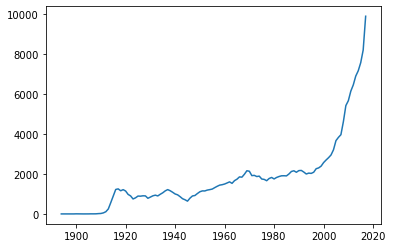

In [24]:
titles.year[titles['year'] < 2018].value_counts().sort_index().plot();

# Problems

### 1. How many movies are in the titles dataframe

### 2. How many movies have the title North by Northwest

### 3. How many version of Hamlet are there, when was the first made? the last?

### 4. List all the movies called Treasure Island from oldest to newest

### 5. How many movies were made in 1950? 1980? 2000?

### 6. How many movies were made between 1950 and 1959? 1980 - 1989? 2000 - 2009

### 7. How big was the cast of Metropolis

### 8. How many roles for actors were there 1950's? 1990's

### 9. How many roles for actors were there 1950's? 1990's

### 10. How many "leading roles" were there in the 2000's?

### 11. How many roles received no ranking in the 2000's? 1950's

### 12. Plot the number of films made in each decade

### 13. Plot the number of films with a Rustler character over time

### 14. What are the top ten character names of all time?

### 15. Which actor appeared in the most films in the 1990's decade?

### 16. What are the top 10 roles that start with Science?